In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
print("Dataset shape:", df.shape)
print(df.info())
print(df.head())

Dataset shape: (11054, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64



Class distribution:
class
 1    6157
-1    4897
Name: count, dtype: int64


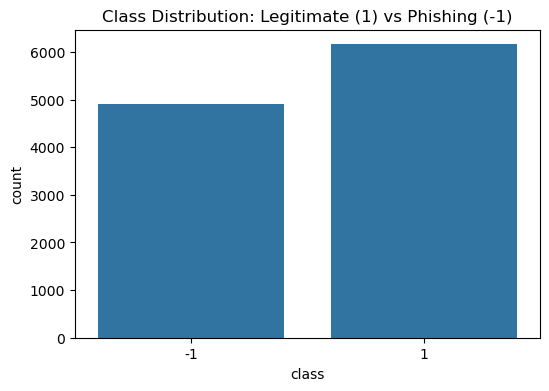

In [9]:
print("\nClass distribution:")
print(df['class'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='class', data=df)
plt.title('Class Distribution: Legitimate (1) vs Phishing (-1)')
plt.show()

In [12]:
# Step 4: Check feature distribution (percentage of 1s)
feature_cols = df.columns.drop('class')
feature_summary = df[feature_cols].mean().sort_values(ascending=False)
print("\nFeature presence rate (percentage of '1's):")
print(feature_summary)


Feature presence rate (percentage of '1's):
Index                  5526.500000
DisableRightClick         0.913877
IframeRedirection         0.816899
StatusBarCust             0.762077
Redirecting//             0.741632
ShortURL                  0.738737
NonStdPort                0.728243
GoogleIndex               0.721549
StatsReport               0.719739
AbnormalURL               0.705446
Symbol@                   0.700561
HTTPSDomainURL            0.675231
InfoEmail                 0.635788
Favicon                   0.628551
UsingPopupWindow          0.613353
DNSRecording              0.377239
LinksPointingToPage       0.343948
UsingIP                   0.313914
WebsiteTraffic            0.287407
HTTPS                     0.251040
RequestURL                0.186720
WebsiteForwarding         0.115705
SubDomains                0.064049
AgeofDomain               0.061335
AnchorURL                -0.076443
LinksInScriptTags        -0.118238
DomainRegLen             -0.336711
PageRank  

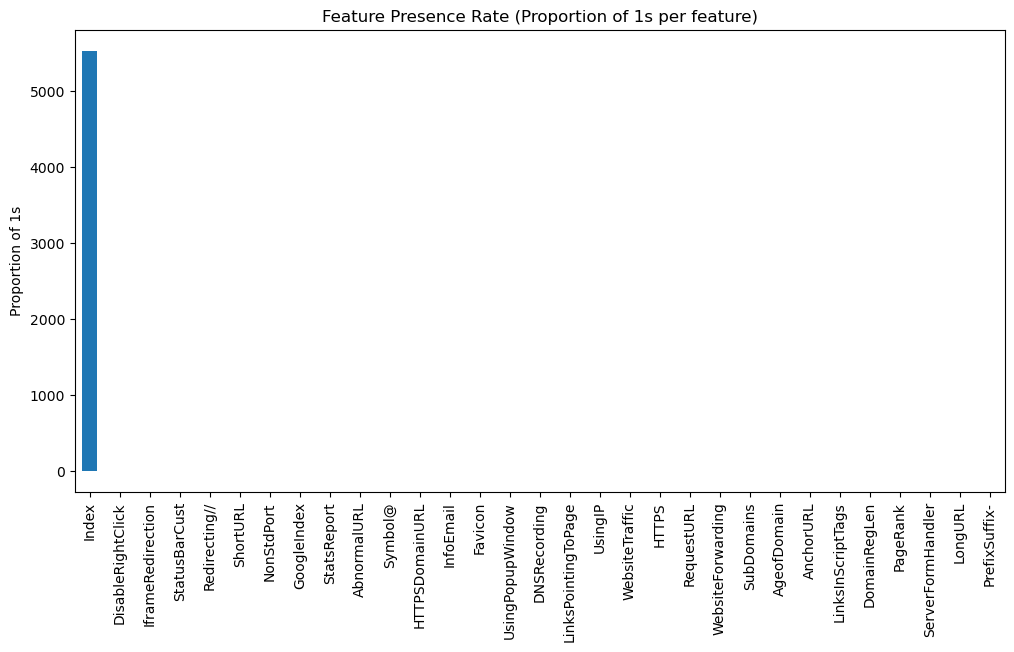

In [13]:
# Plot feature presence rate
plt.figure(figsize=(12,6))
feature_summary.plot(kind='bar')
plt.title('Feature Presence Rate (Proportion of 1s per feature)')
plt.ylabel('Proportion of 1s')
plt.show()

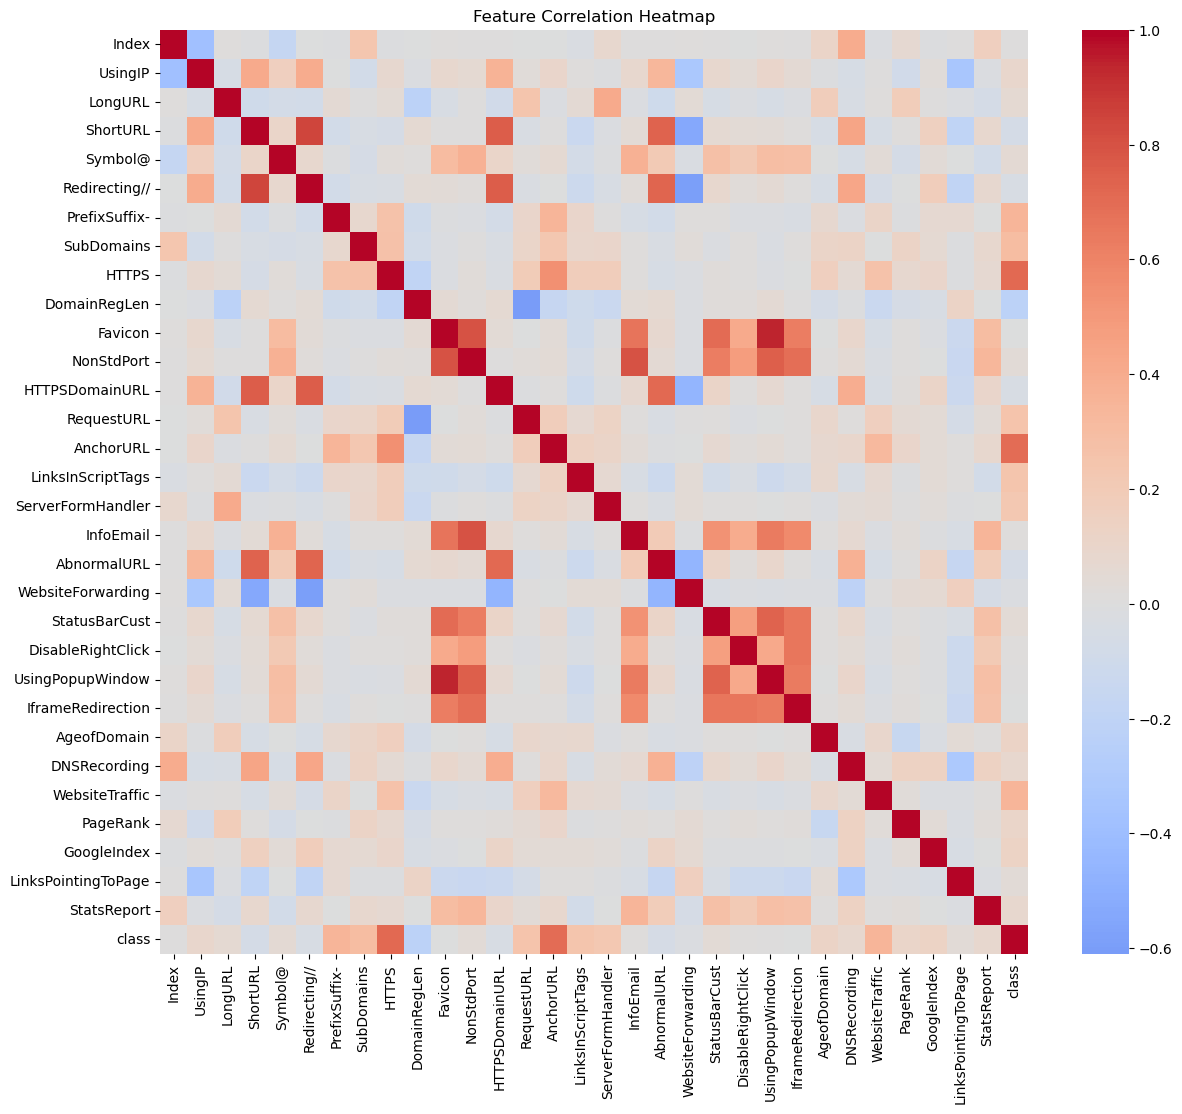

In [14]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

In [ ]:

features_to_remove = ['Favicon', 'UsingPopupWindow']
# Drop only the columns that exist
df = df.drop(columns=[col for col in features_to_remove if col in df.columns])


In [22]:
# Separate features and target
X = df.drop(columns=['class', 'Index'])
y = df['class']

# Optional: remove outliers using Isolation Forest (contamination=0.01)
from sklearn.ensemble import IsolationForest
iso = IsolationForest(contamination=0.01, random_state=42)
outlier_flags = iso.fit_predict(X)
mask_inliers = outlier_flags == 1
X, y = X[mask_inliers], y[mask_inliers]

In [23]:
# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9689497716894977

Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.96      0.96       967
           1       0.97      0.98      0.97      1223

    accuracy                           0.97      2190
   macro avg       0.97      0.97      0.97      2190
weighted avg       0.97      0.97      0.97      2190



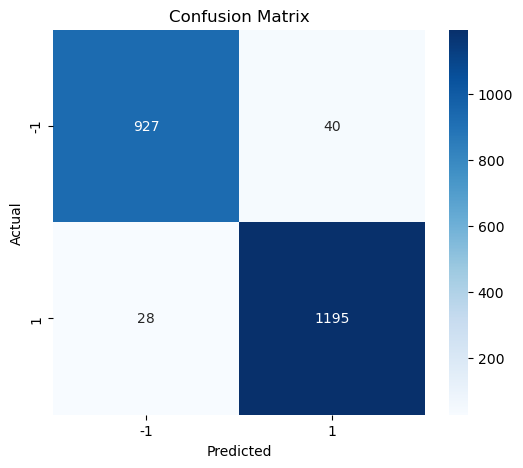

In [24]:
# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=rf.classes_, yticklabels=rf.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

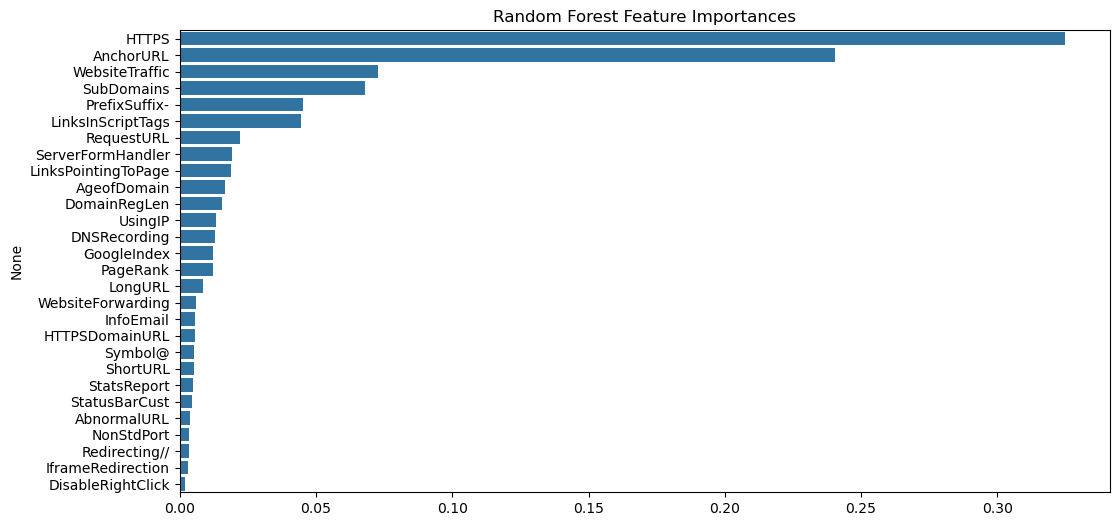

In [25]:
# Feature Importance Plot
importances = rf.feature_importances_
indices = importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(12,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Random Forest Feature Importances')
plt.show()
